<a href="https://colab.research.google.com/github/GalchynskaSofiia/Machine_learning-/blob/main/%D0%9B%D0%A03_%D0%93%D0%B0%D0%BB%D1%8C%D1%87%D0%B8%D0%BD%D1%81%D1%8C%D0%BA%D0%B0_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Лабораторна робота 3. Лінійна регресія. Частина 2. Варіант 4**

Автор: Гальчинська Софія Володимирівна ФІТ 4-8

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Завантажити датасет California Housing Dataset, що містить інформацію
про житло в Каліфорнії. Вивести перших 5 рядків.

Оскільки датасету, що містив би прогнозовану ціну житла в Каліфорнії, не знайдено, то для даного завдання буде розглянуто датасет, що надавався на парі, за посиланням: https://www.kaggle.com/datasets/prokshitha/home-value-insights

In [2]:
import kagglehub
import os
path = kagglehub.dataset_download("prokshitha/home-value-insights")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'home-value-insights' dataset.
Path to dataset files: /kaggle/input/home-value-insights


In [3]:
df = pd.read_csv(os.path.join(path, "house_price_regression_dataset.csv"))
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


1. Провести попередній аналіз даних

In [4]:
df.isnull().sum() #перевіряємо на наявність пропусків, оскільки число пропусків 0, то нічого не замінюємо.

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [5]:
df.duplicated().sum() #перевіряємо наявність дублікатів, оскільки їх 0, то нічого не видаляємо.

np.int64(0)

In [6]:
df.dtypes #перевіряємо тип даних

,0
Square_Footage,int64
Num_Bedrooms,int64
Num_Bathrooms,int64
Year_Built,int64
Lot_Size,float64
Garage_Size,int64
Neighborhood_Quality,int64
House_Price,float64


In [7]:
df.describe() #виводимо статистичні характеристики датасету

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [8]:
df.corr(numeric_only=True)['House_Price'].sort_values(ascending=False) #кореляція між цільовою змінною та іншими показниками

,House_Price
House_Price,1.000000
Square_Footage,0.991261
Lot_Size,0.160412
Garage_Size,0.052133
Year_Built,0.051967
Num_Bedrooms,0.014633
Num_Bathrooms,-0.001862
Neighborhood_Quality,-0.007770


In [9]:
mtx = df.drop('House_Price', axis = 1).corr(numeric_only=True).abs() #обчислюємо матрицю кореляції
mtx

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
Square_Footage,1.000000,0.043564,0.031584,0.022392,0.089479,0.030593,0.008357
Num_Bedrooms,0.043564,1.000000,0.022848,0.015820,0.009355,0.113761,0.049024
Num_Bathrooms,0.031584,0.022848,1.000000,0.021063,0.034923,0.024846,0.017585
Year_Built,0.022392,0.015820,0.021063,1.000000,0.061050,0.025485,0.009549
Lot_Size,0.089479,0.009355,0.034923,0.061050,1.000000,0.002436,0.037630
Garage_Size,0.030593,0.113761,0.024846,0.025485,0.002436,1.000000,0.011287
Neighborhood_Quality,0.008357,0.049024,0.017585,0.009549,0.037630,0.011287,1.000000


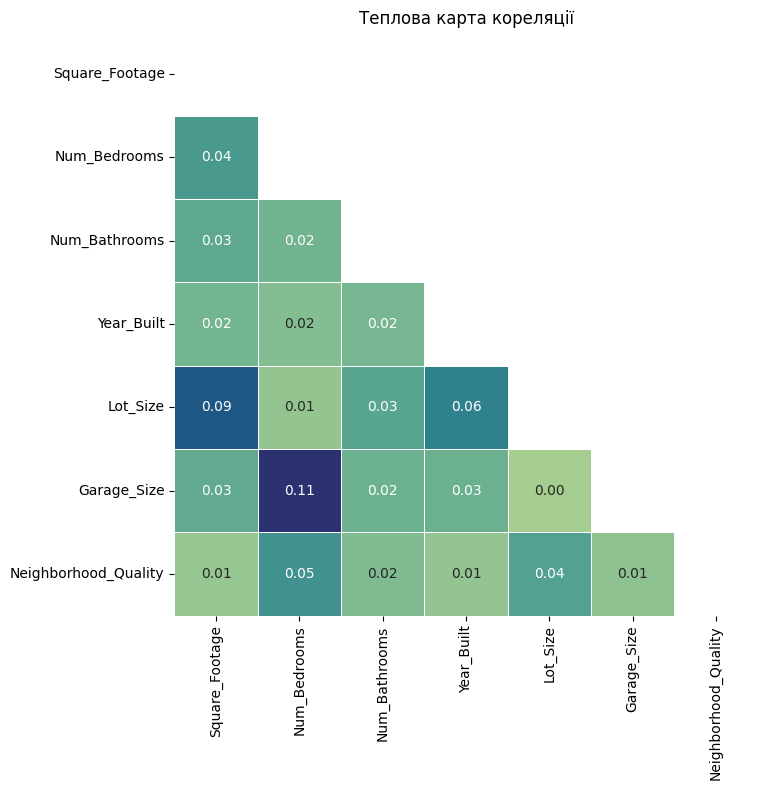

In [10]:
plt.figure(figsize=(8, 8))
sns.heatmap(  #будуємо теплову карту кореляції
    mtx,
    annot=True,
    cmap="crest",
    fmt=".2f",
    linewidths=0.5,
    mask = np.triu(np.ones_like(mtx, dtype=bool)),
    square=True,
    cbar=False,
)

plt.title("Теплова карта кореляції")
plt.tight_layout()
plt.show()

Після проведення попереднього аналізу даних можна зробити висновок, що ціну здебільшого формує показник площі будинку: чим більші будинки, тим вищі ціни на них. Також важливим фактором, щов впливає на ціну є розмір ділянки: більші ділянки, як правило, підвищують вартість нерухомості. Незначний, проте вплив мають такі показники як розмір гаражу та рік побудови. Натомість інші показники майже не впливають на формування ціни.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

2. Масштабувати ознаки.

In [12]:
X = df.drop(columns=['House_Price'])
y = df['House_Price']

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3. Поділити дані на тренувальні і тестові.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Розмір тренувальної вибірки:", X_train.shape)
print("Розмір тестової вибірки:", X_test.shape)

Розмір тренувальної вибірки: (800, 7)
Розмір тестової вибірки: (200, 7)


4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Побудувати графіки моделей.

Підібрати оптимальні параметри за допомогою GridSeach.

In [15]:
models = {
    "LinearRegression": LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    "Ridge": Ridge(alpha=1.0)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = model.score(X_train, y_train)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = {
        "model": model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "RMSE": mse
    }

    print(f"[{name}] R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")

[LinearRegression] R²: 0.999 | MAE: 8174.584 | MSE: 101434798.506
[Random Forest] R²: 0.999 | MAE: 16092.154 | MSE: 396076455.164
[Ridge] R²: 0.999 | MAE: 8241.898 | MSE: 102486578.622


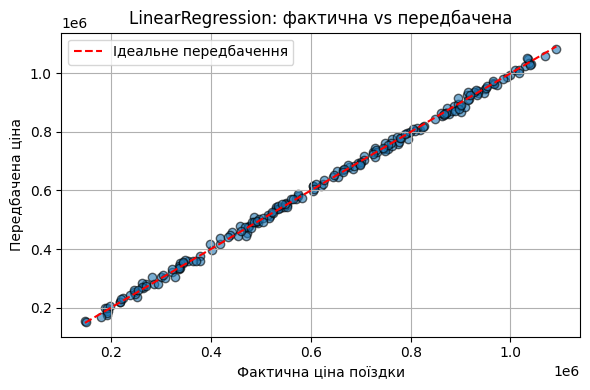

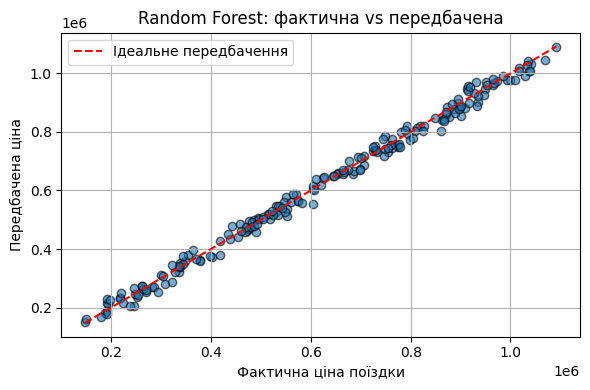

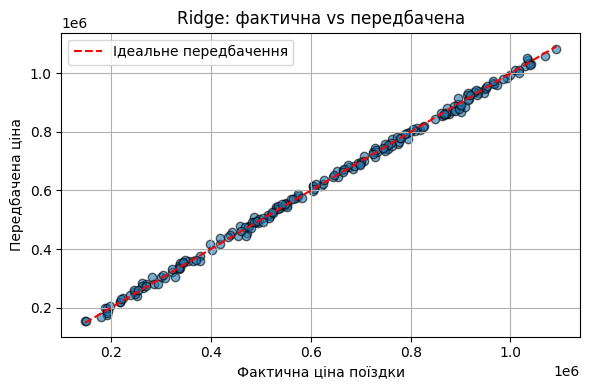

In [16]:
for name, res in results.items(): #будуємо графіки моделей
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, res["y_pred"], alpha=0.6, edgecolors='k')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', label='Ідеальне передбачення')

    plt.xlabel("Фактична ціна поїздки")
    plt.ylabel("Передбачена ціна")
    plt.title(f"{name}: фактична vs передбачена")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
#підбір оптимальних параметрів
from sklearn.model_selection import GridSearchCV

param_grids = {
    "LinearRegression": {
        'fit_intercept': [True, False],
        'positive': [True, False]
    },
    "RandomForest": {
        'n_estimators': [50, 100, 200],
        'max_features': ['sqrt', 'log2', None],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
    },
    "Ridge": {
        'alpha': [0.01, 0.1, 1, 10, 100],
        'fit_intercept': [True, False]
    }
}

In [18]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "Ridge": Ridge()
}

In [23]:
results = {}

for name, model in models.items():
    print(f"\n GridSearch для {name}...")

    grid = GridSearchCV(estimator=model,
                        param_grid=param_grids[name],
                        cv=3,
                        n_jobs=-1)
    grid.fit(X_train, y_train)

    best_params = grid.best_params_
    best_model = grid.best_estimator_

    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "best_params": best_params,
        "best_estimator": best_model,
        "y_pred": y_pred,
        "R²": r2,
        "MAE": mae,
        "MSE": mse
    }

    print("Найкращі параметри:", best_params)
    print(f"[{name}] R²: {r2:.3f} | MAE: {mae:.3f} | MSE: {mse:.3f}")


 GridSearch для LinearRegression...
Найкращі параметри: {'fit_intercept': True, 'positive': True}
[LinearRegression] R²: 0.998 | MAE: 8174.584 | MSE: 101434798.506

 GridSearch для RandomForest...
Найкращі параметри: {'max_depth': 10, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 100}
[RandomForest] R²: 0.994 | MAE: 16137.414 | MSE: 400038896.880

 GridSearch для Ridge...
Найкращі параметри: {'alpha': 0.01, 'fit_intercept': True}
[Ridge] R²: 0.998 | MAE: 8175.224 | MSE: 101444289.537


In [24]:
df_results = pd.DataFrame(results).T
df_results

,best_params,best_estimator,y_pred,R²,MAE,MSE
LinearRegression,"{'fit_intercept': True, 'positive': True}",LinearRegression(positive=True),"[868687.1074790407, 490337.89825446997, 945667...",0.998426,8174.5836,101434798.505636
RandomForest,"{'max_depth': 10, 'max_features': None, 'min_s...","(DecisionTreeRegressor(max_depth=10, random_st...","[851367.5623219402, 508466.7790808024, 948585....",0.993794,16137.413976,400038896.879784
Ridge,"{'alpha': 0.01, 'fit_intercept': True}",Ridge(alpha=0.01),"[868683.7712886304, 490339.27204196504, 945662...",0.998426,8175.223758,101444289.536775


Бачимо, що оптимальні параметри мають також високий коефіцієнт детермінації і в деяких місцях трохи менші значення середньої абсолютної і середньої квадратичної похибок. У даному випадку різниця не суттєва, тож можна обійтись без обчислення оптимальних параметрів і будувати модель на параметрах по замовчуванню. Проте параметри, підібрані таким шляхом, у деяких випадках будуть краще для побудови моделей.

5. Вивести R2 і MSE.

In [25]:
for name, res in results.items():
    print(f"{name}: R² = {res['R²']:.3f} | MSE = {res['MSE']:.3f}")

LinearRegression: R² = 0.998 | MSE = 101434798.506
RandomForest: R² = 0.994 | MSE = 400038896.880
Ridge: R² = 0.998 | MSE = 101444289.537


6. Вивести справжні і прогнозовані значення.

In [26]:
comparison_df = {}

for name, res in results.items():
    df_comp = pd.DataFrame({
        "Фактична ціна": y_test.values,
        f"Передбачена ціна ({name})": res["y_pred"]
    })
    df_comp[f"Похибка ({name})"] = df_comp[f"Передбачена ціна ({name})"] - df_comp["Фактична ціна"]

    comparison_df[name] = df_comp

#виведемо по 10 випадкових рядків для кожної моделі
for name, df in comparison_df.items():
    print(f"\n===== {name} =====")
    print(df.sample(10, random_state=42).round(2))



===== LinearRegression =====
     Фактична ціна  Передбачена ціна (LinearRegression)  \
95      1068538.11                           1059729.02   
15       194353.74                            187868.55   
30       270230.64                            279715.82   
158      986006.86                            981949.27   
128      953339.73                            957382.95   
115      914555.75                            909764.27   
69       746167.73                            742469.14   
170      646766.29                            654445.55   
174      523323.07                            524605.44   
45      1008539.16                           1011343.64   

     Похибка (LinearRegression)  
95                     -8809.09  
15                     -6485.18  
30                      9485.18  
158                    -4057.59  
128                     4043.22  
115                    -4791.47  
69                     -3698.59  
170                     7679.26  
174           

**Висновки:** Отже, під час даної лабораторної роботи було проведено попердній комплексний аналіз даних для прогнозування вартості житла. Попередня обробка даних включала перевірку даних на пропуски та дублікати, обчислення кореляції між показниками вартості житла та іншими факторами, побудову теплової карти кореляції, виведення статистичних характеристик датасету тощо.

Далі для дослідження було масштабовано ознаки та поділено дані на на тренувальні і тестові вибірки. Побудовано 3 моделі: лінійна регресія, Ridge та Random Forest. Порівняння результатів показало, що лінійна регресія у даному випадку мала найвищу точність. При параметрах по замовчуванню коефіцієнт детермінації у моделей був однаковим, проте середня абсолютна та середня квадратична похибки були меншими саме у лінійної регресії. Дуже схожа ситуація після знаходження оптимальних параметрів для моделей: коефіцієнт детермінації був однаково високим і у моделі лінійної регресії, і у моделі гребеневої регресії, проте похибки (середня абсолютна та середня квадратична) все ж таки були трохи меншими у лінійної регресії.